# Lick events

*Imports and data_folder access*

In [11]:
import pickle
import numpy as np
from pathlib import Path
import glob
import pandas as pd
import matplotlib.pyplot as plt

# switch the path to represent the correct directory when switching devices and fetch the latest repo from github
# Marc_PC
data_folder_1 = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")
data_folder_2 = Path(r"Z:\davide\2p_data\441394_ribolla")
data_folder_3 = Path(r"Z:\davide\2p_data\441406_fiano")

# Amber_laptop
#data_folder_1 = Path(r"C:\Users\renek\OneDrive\Documenten\Marc Studiemap\Master Internship 1\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")
#data_folder_2 = Path(r"Z:\davide\2p_data\441394_ribolla")
#data_folder_3 = Path(r"Z:\davide\2p_data\441406_fiano")

In [12]:
# Path to where the data is on your machine.
data_path_1 = data_folder_1.joinpath('20230211')

# ribolla files
data_path_2 = data_folder_2.joinpath('20230315')
data_path_3 = data_folder_2.joinpath('20230324')
data_path_4 = data_folder_2.joinpath('20230331')
data_path_5 = data_folder_2.joinpath('20230404')
data_path_6 = data_folder_2.joinpath('20230405')

# fiano files
data_path_7 = data_folder_3.joinpath('20230309')
data_path_8 = data_folder_3.joinpath('20230317')
data_path_9 = data_folder_3.joinpath('20230323')
data_path_10 = data_folder_3.joinpath('20230328')
data_path_11 = data_folder_3.joinpath('20230331')

# Create a list to store all the data paths
all_data_paths = [
    data_path_1,
    data_path_2,
    data_path_3,
    data_path_4,
    data_path_5,
    data_path_6,
    data_path_7,
    data_path_8,
    data_path_9,
    data_path_10,
    data_path_11
]

In [86]:
import sys
sys.path.append('../src') # Add src folder to path.
import file_management as fm # Import my file_management functions from /src.

selected_data_session = all_data_paths[1] # select one of the sessions! 0-10
fm.get_files_in_data_path(selected_data_session)

['Z:\\davide\\2p_data\\441406_fiano\\20230331\\behaviour_data.pickle',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\cnmf.hdf5',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\decoded_log.mat',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\metrics.pickle',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\neural_data.pickle',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\parameters.yml',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\tif_header.pickle',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\trial_data.csv']

In [87]:
selected_data_session

WindowsPath('Z:/davide/2p_data/441406_fiano/20230331')

In [88]:
import os

# List all the files in the selected data session
files = os.listdir(selected_data_session)
print(files)

['behaviour_data.pickle', 'cnmf.hdf5', 'decoded_log.mat', 'metrics.pickle', 'neural_data.pickle', 'parameters.yml', 'tif_header.pickle', 'trial_data.csv']


# Goal 1: reward licks, fraction of licks during reward presentation, eventplot of licks
1. isolate the reward presentation for each trial. Find the number of licks that happened between the reward presentation and two seconds (2000 frames) after.
2. use eventplot to plot the licks for each trial on the same plot (x axis: time, y axis: trial)

This will tell us if there is a change in licking patterns during the course of the trial

*Trial Matrix*

In [89]:
# Update the trial_data_file and read the CSV file (accessing a specific file within the selected data session)
trial_data_file = selected_data_session.joinpath('trial_data.csv')
trial_data = pd.read_csv(trial_data_file)
#trial_data

*Behavioural Data*

In [90]:
# Load behavioural data.
bdata_file = selected_data_session.joinpath('behaviour_data.pickle')
with open(bdata_file,'rb') as file:
    b_data = pickle.load(file)

In [91]:
import sys
sys.path.append('../src') # Add src folder to path.

import lick_analysis as la # Import my lick analysis functions from /src.

In [92]:
# Call the function and print the results.
lick_count, reward_fraction = la.lick_counter(trial_data, b_data)
print("Number of licks during reward window:", lick_count)
print("Fraction of licks at reward onset:", reward_fraction)

Number of licks during reward window: 395
Fraction of licks at reward onset: 26.072607260726073


395
0.2607260726072607


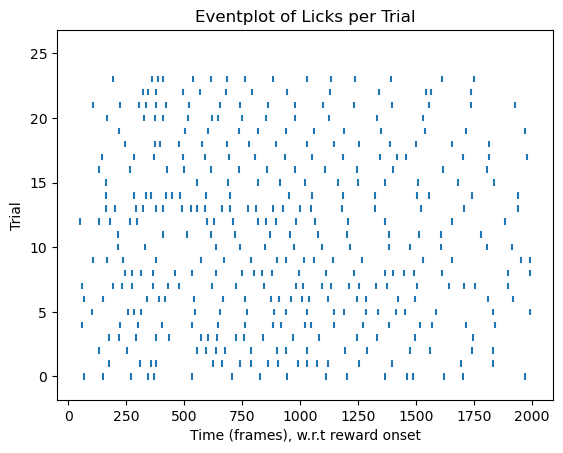

In [93]:
save_folder = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\plots\lick_eventplots")
la.lick_eventplot(trial_data, b_data, selected_data_session, save_folder)